# Setup

## Installations

In [1]:
import pickle
!pip install minatar > /dev/null

## Importations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from PIL import Image
from IPython.display import clear_output, display, Image as JImage
import imageio
import torch
import torch.nn as nn
from collections import deque, namedtuple
import random
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
from tqdm.notebook import tqdm

## Jupyter extensions

In [3]:
%load_ext autoreload
%autoreload 2

# Environment

In [4]:
env = gym.make('MinAtar/Breakout-v1')
env.reset();

In [6]:
from utils.utils import state_to_image

def render_env(env):
    """Needed as env.render() did not work by itself"""
    img = state_to_image(env.render('array'))
    plt.imshow(img)
    plt.show()

def render_game(frames, fps=20, show_every_x_frames=1, path='game.gif', size=200):
    processed_frames = []
    for frame in tqdm(frames[::show_every_x_frames], desc="Rendering gif", leave=False):
        img = Image.fromarray(state_to_image(frame)).resize((size, size), Image.Resampling.NEAREST)
        processed_frames.append(np.asarray(img))
        imageio.mimwrite(path, processed_frames, fps=fps)
    display(JImage(open(path, 'rb').read()))

def play_game(env, agent=None, fps=20, show_every_x_frames=1, path='game.gif', size=200):
    frames = []
    rewards = 0
    state = env.reset()
    choose_action = lambda s: env.action_space.sample() if agent is None else agent.act(s)
    while True:
        state, r, done, _ = env.step(choose_action(state))
        frames.append(state)
        rewards += r
        if done:
            break
    render_game(frames, fps, show_every_x_frames, path, size)
    print(f"Total rewards: {rewards}")

Rendering gif:   0%|          | 0/6 [00:00<?, ?it/s]

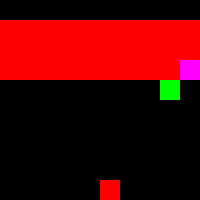

Total rewards: 0


In [7]:
play_game(env)

# Training DQN

In [59]:
dqn_path = "./networks_weights/DQN"

In [60]:
from agents.dqn import DQNAgent

dqn = DQNAgent(env, gamma=0.999, batch_size=256, epsilon_min=0.002)
# dqn = DQNAgent.load('dqn_path')

Run the following command to monitor training: tensorboard --logdir ./logs


In [61]:
dqn.train(100_000)

Timestep: 3192, Loss: 11756.3311:   3%|▎         | 3195/100000 [00:20<10:06, 159.50it/s]


KeyboardInterrupt: 

In [ ]:
dqn.save(dqn_path)

Rendering gif:   0%|          | 0/16 [00:00<?, ?it/s]

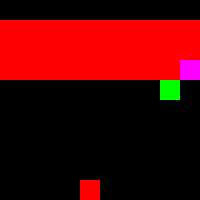

Total rewards: 1


In [56]:
play_game(env, dqn)